# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Read data**


In [10]:
dataset = pd.read_csv('survey lung cancer.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
y = dataset['LUNG_CANCER'].values
print(X)

[[69  1  2 ...  2  2  2]
 [74  2  1 ...  2  2  2]
 [59  1  1 ...  2  1  2]
 ...
 [58  2  1 ...  1  1  2]
 [67  2  1 ...  2  1  2]
 [62  1  1 ...  1  2  1]]


**SPLITTING DATA INTO TRAIN AND TEST**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

**FITTING THE DATA**

In [14]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Support Vector Classification MODEL**

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


**CONFUSSION MATRICS**

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

VISUALIZATION

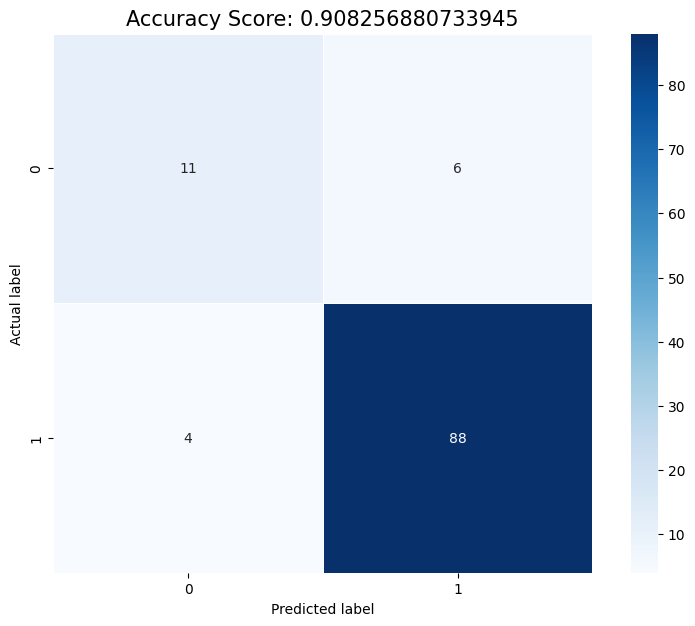

In [17]:
import seaborn as sns
# Draw the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

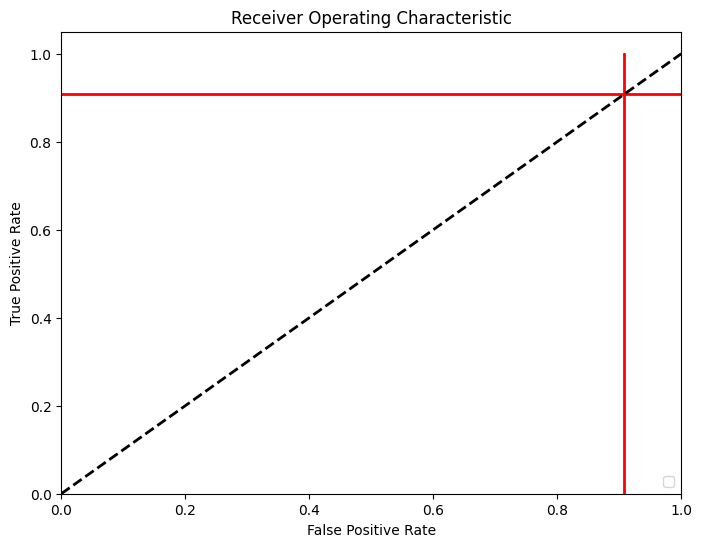

In [18]:
# Draw the accuracy
plt.figure(figsize=(8,6))
plt.plot([0, 1], [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)], 'r-', lw=2)
plt.plot([accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)], [0, 1], 'r-', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.fill_between([0, 1], [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)], [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)], alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**VISIULIZATION OF TRAINING SET**

<ipython-input-30-c0bd4e2703d5>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


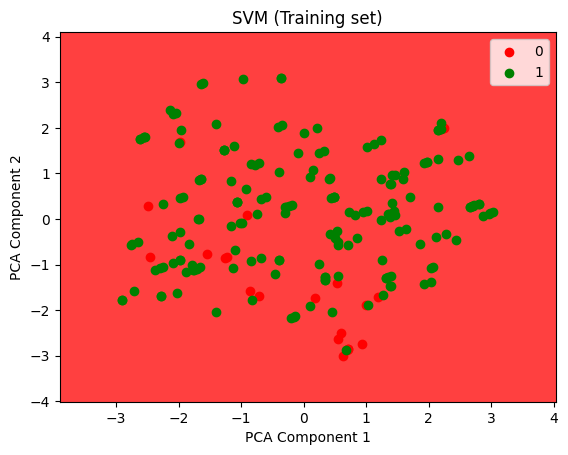

In [30]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming X_train and y_train are already defined and classifier is trained

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train the classifier on the reduced dataset
classifier.fit(X_train_pca, y_train)

# Create the meshgrid for plotting
X_set = X_train_pca
y_set = y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) # Changed plt.ylim2 to plt.ylim

# Plot the training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Training set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

**VISIULIZATION OF TEST SET**

<ipython-input-32-8973a66f135f>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


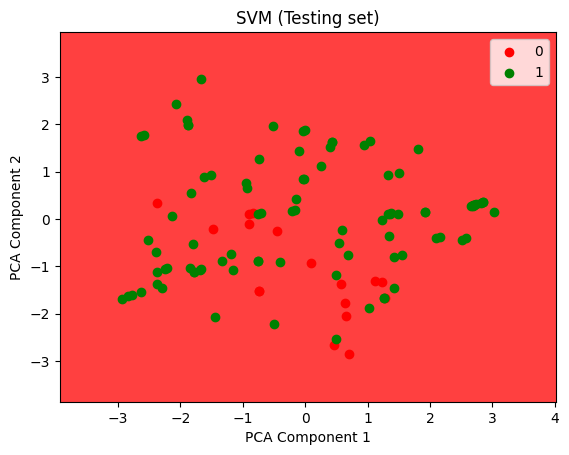

In [32]:
# --- Plotting for Testing Set ---
# Create the meshgrid for plotting (testing set) - adjust ranges if needed
X_set = X_test_pca
y_set = y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary (testing set)
plt.figure()  # Create a new figure for the testing set plot
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the testing points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('SVM (Testing set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()